In [1]:
!python --version

Python 3.12.3


In [15]:
!pip install tensorflow

In [217]:
"""For the Deep Learning using TensorFlow and Keras course;
   Author: Arta Khosravi
   Nov. 2025""";

---------

## Installing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import scipy as sp
import pandas as pd
sns.set_style("whitegrid")

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
tf.__version__,keras.__version__

('2.20.0', '3.11.3')

# For the Regression Cases:

In [7]:
california_housing = fetch_california_housing()
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
print(california_housing.data.shape, california_housing.target.shape)

(20640, 8) (20640,)


In [11]:
california_housing_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target_ty = pd.Series(california_housing.target, name="target")
california_housing_df['target_train_y'] = target_ty
california_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_train_y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


C:\Users\Asus\AppData\Local\Temp\ipykernel_19800\4029448408.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  california_housing_df.hist(bins=20, ax=ax_1, alpha=0.5)


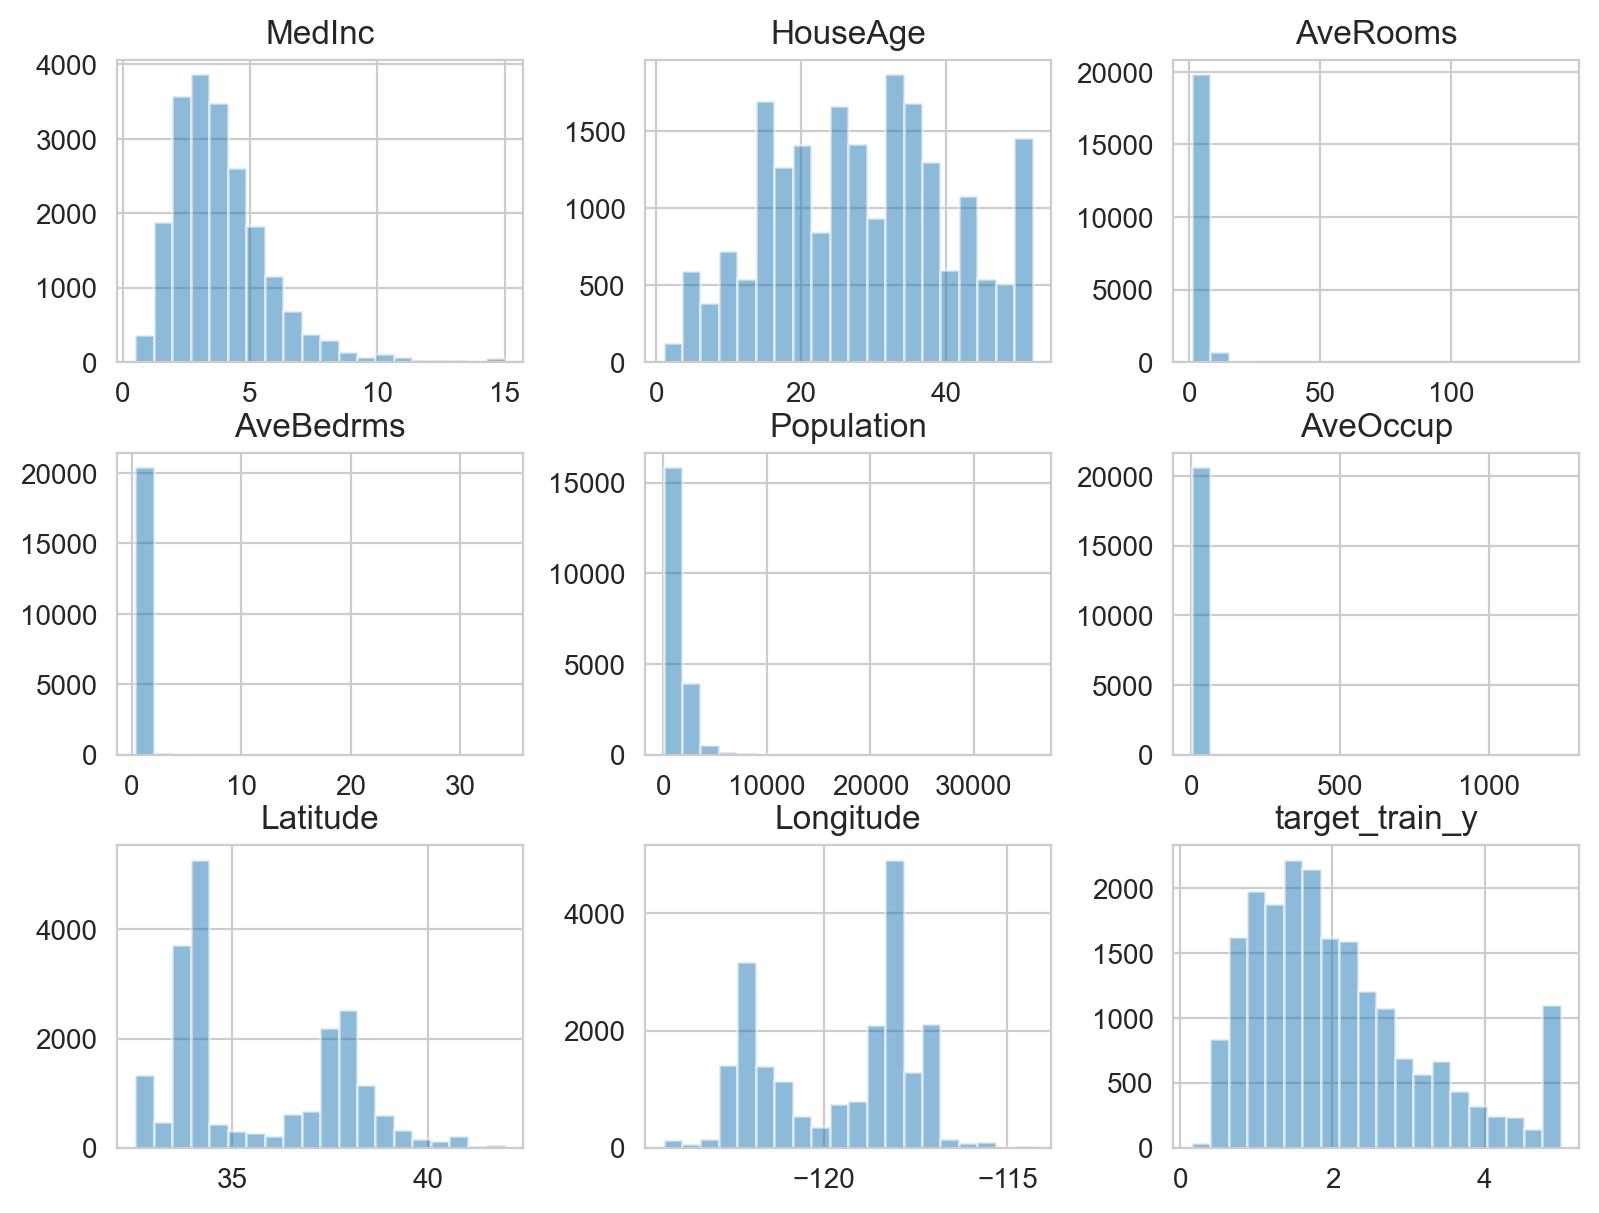

In [13]:
fig, ax_1 = plt.subplots(figsize=(8,6))

plt.tight_layout()
california_housing_df.hist(bins=20, ax=ax_1, alpha=0.5)
plt.show()

In [15]:
#Using the train_test_split function to automatichally split our data into train/test separations.
#Test size is automatichally 0.25.
X_train0, X_test, y_train0, y_test = train_test_split(
                 california_housing["data"],
                 california_housing["target"])

In [17]:
#train test splitting the above data so we can get a validaion data.
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,y_train0)

In [19]:
X_train0.shape,X_test.shape,X_train1.shape,X_validation.shape

((15480, 8), (5160, 8), (11610, 8), (3870, 8))

In [21]:
sc = StandardScaler() #So we can normalize the data #In other situations we might use minscalar, etc.
X_train_s = sc.fit_transform(X_train1) #I want the data to fit on X_train1, and normalize it too. #X_train_scaled
X_validation_s = sc.transform(X_validation) #the next are only normalized, they were fitted on train before.
X_test_s = sc.transform(X_test)

In [23]:
model = keras.models.Sequential([ #making a sequential model again
    keras.layers.Dense(50, activation="relu"), 
    #They are all dense, each row of our input layer is a vector. 
    #So each one isnt 2D (number*number) to require a "Flatten."
    #Thus, if the input of our Deep (sequential) model (the layers of it are Deep) is images, we need to use flatten for the initial layer.
    #Else, we only need dense layers (each row is 1D).
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1) #We only want to know the price of this house, so we only require one neuron at the output layer.
    #The activation is also not required, because the required number is not limited.
    #If we wanted to force the model to predict between 0 to 5, or -1 to 1, then we can use "activation," else it is not needed.
])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Model training APIs:
1) Compile method: Configures the model for training.
2) Fit method: Trains the model for a fixed number of epochs (dataset iterations).
3) Evaluate method: Returns the loss value & metrics values for the model in test mode.
4) Predict method: Generates output predictions for the input samples.
5) train_on_batch method: Runs a single gradient update on a single batch of data.
6) test_on_batch method: Test the model on a single batch of samples.
7) predict_on_batch method: Returns predictions for a single batch of samples.

## Compiling the model

In [27]:
model.compile(loss="mean_squared_error", #Choosing the loss function of the Regression model
              optimizer="sgd", #Stochastic gradiant descent
              metrics=["mean_absolute_error"])

## Fitting the model

In [63]:
history = model.fit(X_train_s, #Our trained X and validation X were scaled.
          y_train1,  # X_train0: y_train0 -> X_train1 : y_train1 -> X_validation: y_validation
          epochs=30,
          validation_data=(X_validation_s, y_validation)) 
          #Here, instead of validation_split, we will use validation_data because our validation data was specified.
#Loss: Mean squared error: to match with our data, we need to ^1/2 it.
# (Predicts - True)^2 / avg. all predicts : MSE
# Metric: Mean absolute error: Predicts - True (Epoch 30/30: val_mean_absolute_error: 0.3872)
# Due to metric, and since the unit of target is 100,000; the differentiation of price is about 0.38*100,000 ~ 38,000$.

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2850 - mean_absolute_error: 0.3699 - val_loss: 0.3319 - val_mean_absolute_error: 0.3958
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2840 - mean_absolute_error: 0.3693 - val_loss: 0.3334 - val_mean_absolute_error: 0.4000
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2832 - mean_absolute_error: 0.3693 - val_loss: 0.3201 - val_mean_absolute_error: 0.3799
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2843 - mean_absolute_error: 0.3704 - val_loss: 0.3213 - val_mean_absolute_error: 0.3824
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2831 - mean_absolute_error: 0.3689 - val_loss: 0.3155 - val_mean_absolute_error: 0.3789
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2822 - mean_absolute_error: 0.3694 - val_loss: 0.3206 - val_mean_absolute_error: 0.3769
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2830 - mean_absolute_error: 0.3695 - v

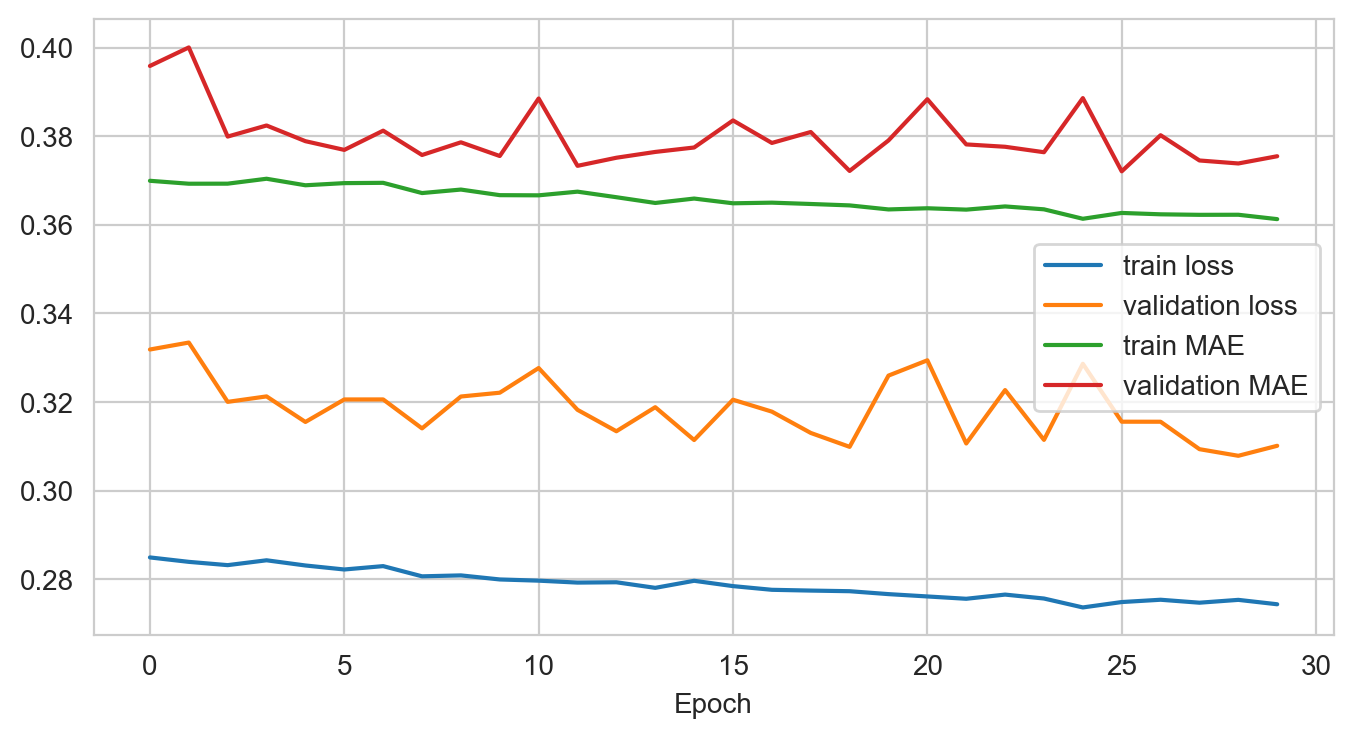

In [65]:
fig = plt.subplots(figsize=(8, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["mean_absolute_error"], label="train MAE")
plt.plot(history.history["val_mean_absolute_error"], label="validation MAE")
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Evaluating the model:

In [67]:
loss_eval, metrics_eval = model.evaluate(X_test_s, y_test, verbose=0)
print("Loss value: ",loss_eval,"\nMetrics value (MAE): ",metrics_eval)

Loss value:  0.27708712220191956 
Metrics value (MAE):  0.36461061239242554


## Predicting the model

In [69]:
x_test_8 = X_test_s[0:8]
x_test_8.shape

(8, 8)

In [71]:
pred_8 = model.predict(x_test_8).round(3)
pred_8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[2.53 ],
       [3.555],
       [2.229],
       [0.887],
       [1.991],
       [1.384],
       [1.803],
       [4.203]], dtype=float32)

In [73]:
y_test[0:8]

array([2.797  , 4.143  , 2.155  , 0.828  , 1.554  , 1.625  , 2.165  ,
       5.00001])

------------